### Black Friday Sales Analysis
#### If you like my analysis please upvote else comment below your suggestions

This patricular dataset contains the Sales details of a retail store. we will analyse various features in the dataset and go through the complete data analysis process. Before getting into the process the details about dataset provided[Black friday](https://www.kaggle.com/mehdidag/black-friday) were not completly clear.
1. Product category 1,2,3 what are these?
2. occupation id what each id means?
3. what does purchase tell is it price of that product or total price for which they bought?

Even though data is not clear the major reason of this kernel is to provide the insight on how to analyse a dataset, what is the process or steps in the analysis.

### The data analysis Process
The process contains 5 major steps 
1. Questions
2. Wrangle
3. Explore
4. Draw Conclusions
5. Communicate

we will look into each steps one by one going through the analysis.

### 1. Questions
Asking right questions is the key part of the analysis process this will define what you are going to present to the audience. Answers to the right questions will provide key inputs to the company or the audeince to improve thier business.

if we consider our black friday data set the appropriate questions and thier results will lead to better functioning of the retail store on thier sales.

we already have a dataset so lest take a glance at that and figure out the appropriate questions to ask.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('BlackFriday.csv')

In [268]:
df.head(1)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370


As we can see the datset contains 12 features. so from these features let us form few questions that would help the store to better understand thier customers.

1. which age group of customers are more likely to purchase with More amount per person?
2. which age group and gender have high visiting rate to the retail store?
3. which occupation type have high purchase rate?
4. who has high purchase rate newly settled or people staying from long time?
5. Top 10 products which made hihgest sales in the store?
6. Based on marital status and gender who has high purchase rate?
7. Which product is popular for each age group?
8. What is the purchase percent for each age group and for Gender Group in total purchase amount?

 > **NOTE**:Questions differ by point of view of the analyst if you have any different questions please post in comments i will try to add in new version of kernel.

### 2. Wrangle

wrangling is the part were we make sure that the data we collected for analysis is of good quality. Here we assess the data quality and clean the data. Wrangling is the part where we take care of missing data, duplicate data, incorrect datatypes etc.,

let us check the basic summary which our dataset tells us.

In [4]:
df.info()  ### it gives us the summary about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


##### what we can understnad from the summary?

1. Total samples in our datset are 537577 (no of rows)
2. This dataset has 12 features(no of columns)
3. Only Product Category 2 and 3 have missing values => total no of non-null are less than total samples  
4. There are 2 features of float type, 5 features of int type, 5 features of object type(String)
5. Stay_In_Current_City_Years is a number but the type it is showing is object(String) let us find why?
6. Age in dataset is range so it is Object(String)
7. product category 2,3 are shown float let us find why?

***i) Missing data***

In [5]:
df.isnull().sum() ### gives the sum of missing values with respect to columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Only product category 2,3 have missing values. As the details of these columns were not specified ***i assume*** that the particular product doesn't come into any category in that field so let us replce them with 0. (why with 0, in the below code you can check different unique values in that feature)

In [6]:
df['Product_Category_2'].unique()  ## gives different values in that column

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [7]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [8]:
df.fillna(0,inplace=True) ### replace nan with 0 in that same dataframe

***ii) incorrcect datatypes***

All the unique values after handling the missing values in product category 2,3 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.

In [9]:
df.Product_Category_3 = df.Product_Category_3.astype('int64')
df.Product_Category_2 = df.Product_Category_2.astype('int64')


In [10]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Stay_In_Current_City_Years feature contains few values as strings("4+") so the data type remains Object.

***iii) Duplicate Values***

In [266]:
sum(df.duplicated())

0

So the dataset doesn't contains any duplicated values. It is a good news but ***if we had duplicate values*** we should drop the rows with those values because when we are training supervised learning models there is chance it memorises those rows. 

### 3. Explore

Now we will analyse and visulaize the questions we posed and find out what data tells us.

> **1. which age group of customers are more likely to purchase with More amount per person?**

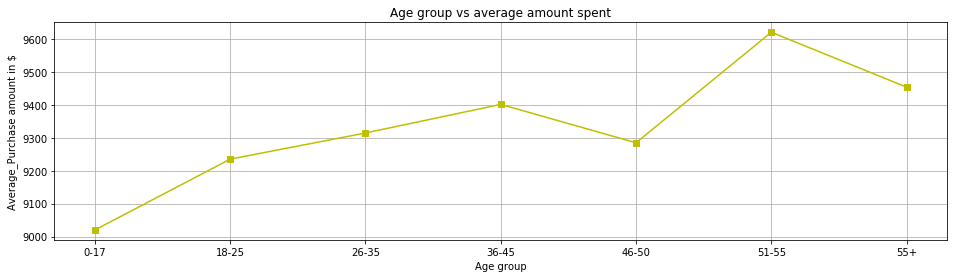

In [50]:
data = df.groupby('Age')['Purchase'].mean()
data  = pd.DataFrame({'Age':data.index, 'Average_purchase':data.values})
plt.figure(figsize = (16,4))
plt.plot('Age','Average_purchase','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');

People of Age group 51-55 have spent more on purchase. Approximately 9600$ on average spent by People between age 51-55.

The graph values tends to increase. so higher the age group higher the intrest in the sale.But there is a slight purchase variation in 46-50 and 50-55 age people.

>**2.which age group and gender have high visiting rate to the retail store?**

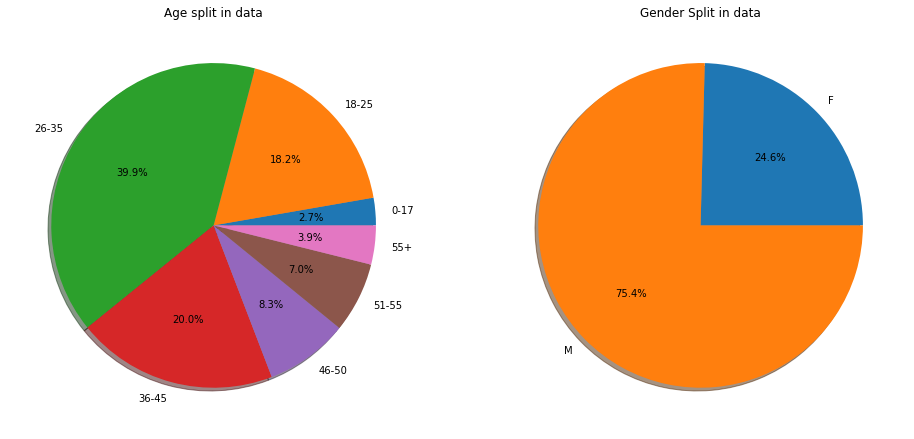

In [247]:
data_Age = df.groupby('Age')['Age'].count()
data_Sex = df.groupby('Gender')['Gender'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.subplot(122)
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');

If we check the second pie, By this stat we can tell that the store gets most of the male customers (75.4% male 24.6% Female). 

Now to the first Pie this will give intresting understanding when we comapre it with first question solution.
1. **This shows 40% of customers are 26-35 age group and 20% are from 36-45  => 60% of customers from 26-45 age group.**
2. **only 7% of customers are of 51-55 Age group.**

 **From 1st and 2nd questions we can tell 60% of customers from 26-45 who have a medium purchase rate. 7% of customers are from 51-55 who have high purchase rate. This Gives an intresting insight on sales to store owners.**

> **which occupation type have high purchase rate?**

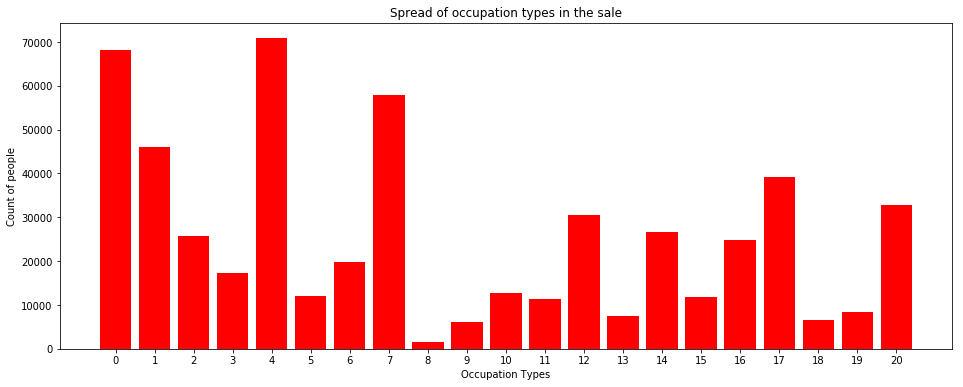

In [109]:
data_occup = df['Occupation'].value_counts();
plt.figure(figsize = (16,6));
plt.bar(data_occup.index,data_occup.values,color ='r');
plt.xticks(data_occup.index);
plt.xlabel('Occupation Types');
plt.ylabel('Count of people');
plt.title('Spread of occupation types in the sale');

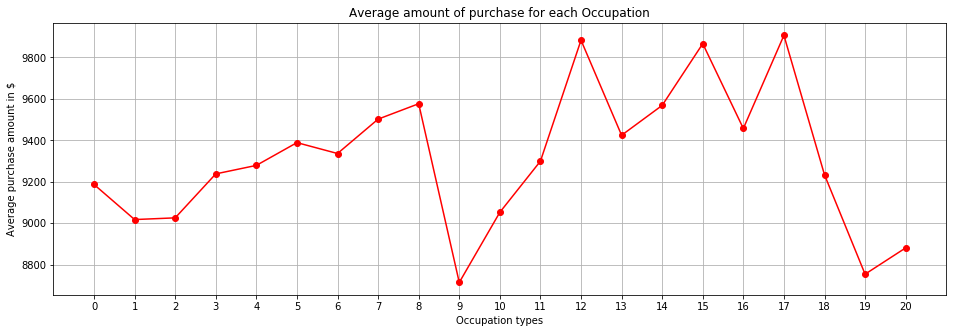

In [89]:
data = df.groupby('Occupation')['Purchase'].mean();
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'ro-');
plt.xlabel('Occupation types');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for each Occupation');
plt.xticks(data.index);

There are few points to observe from these plots
1. **Occupation type 12,15,17 have high purchase rates but no of people with those occupations are not in large amount.**
2. **Occupations 0,4 and 7 have higghest amount of people but their average amount of purchases are less.**
3. **If we observe occupation 8 and 9 no of people in 8 and lesser than in 9 but the average spending of occupation 8 is roughly 800 dollars  more than occupation 9.**
4.  **If we observe 11 adn 12 total people and average spending both are more for 12. So no of people is not correlated with purchase.**
5. **Occupation 8 which doesnot even have 10,000 no of people have average spending just 300 dollars less than occupation 17 with 40,000 people. So occupation 8 looks like heavy spenders.**
6. **occupation 4 which has highest amount of people has spending 600 dollars less than the highest Spender.**
7. **occuption 1 has 20,000 more people than occupation 2 but they seem to have roughly same amount of spending.**

> **who has high purchase rate newly settled or people staying from long time?**

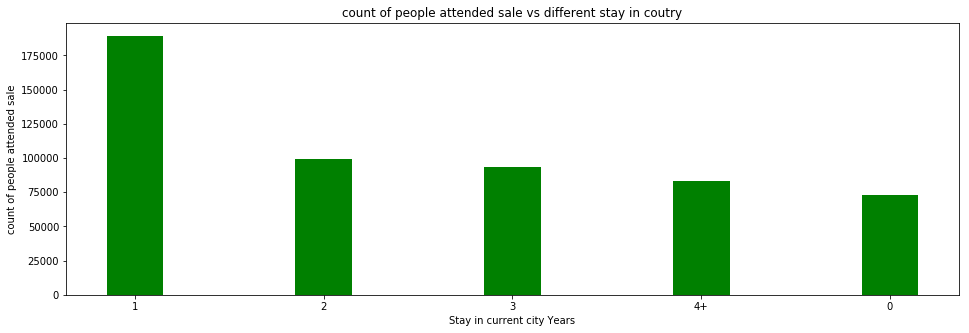

In [112]:
data = df['Stay_In_Current_City_Years'].value_counts();
plt.figure(figsize=(16,5));
plt.bar(data.index,data.values,width=0.3,color = 'green');
plt.xlabel('Stay in current city Years');
plt.ylabel('count of people attended sale');
plt.title('count of people attended sale vs different stay in coutry');

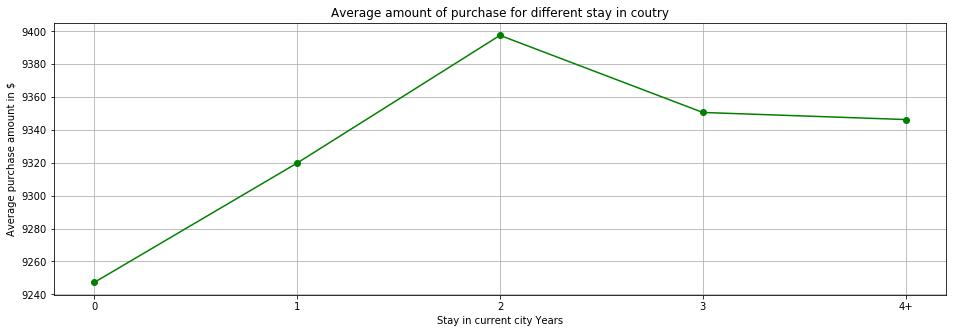

In [108]:
data = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'go-');
plt.xlabel('Stay in current city Years');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for different stay in coutry');

**People who are 2 years residents spent more on average in the sale.Even though the 1 year reisdents visited more in sale they have not spent much but 2 years residents who are around 100,000 people visited, each have spent 9400$ on average**.

> **Top 10 products which made highest sales in the store?**

In [263]:
data1 = df.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = df['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left');

data = data.sort_values(['Purchase'],ascending=False)[0:10];

     Product_ID  Purchase  Count
2534  P00265242  13983325   1858


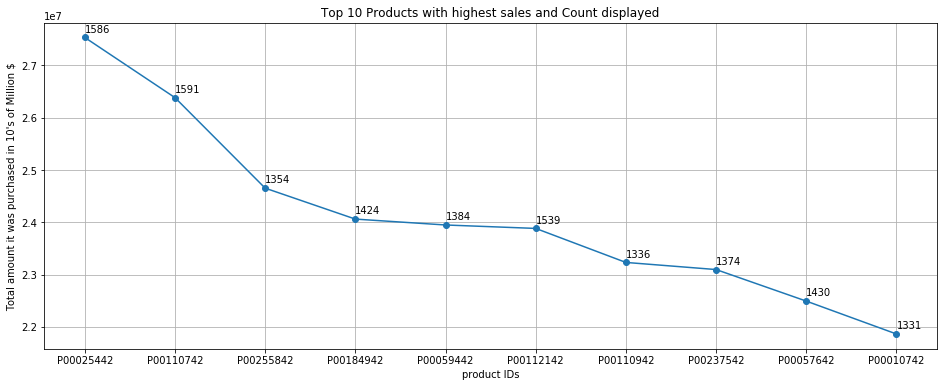

In [262]:
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(data['Product_ID'],data['Purchase'],'o-');
plt.xlabel('product IDs');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Top 10 Products with highest sales and Count displayed');
for a,b,c in zip(data['Product_ID'], data['Purchase'], data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();

We can see 10 products their purchase amount and count of products saled.
1. 1st product has 1586 pieces sold with total sale of 27.5 million and 2nd product with 1591 pieces sold but with 26.5 million. which means 1st product might have higher product cost.
2. 3rd product has 1354 units sold and 4th product has 1424 units sold but 4th product has low price than 3rd product so even it has higher products sold it has lesser sale amount than 3rd. 
3. similarly we can observe for all the products.

> **Based on marital status and gender who has high purchase rate?**

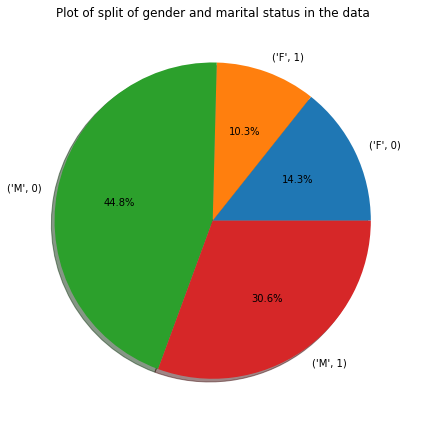

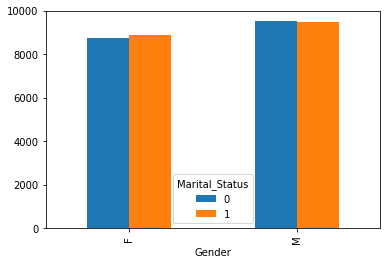

In [186]:
data = df.groupby(['Gender','Marital_Status'])['Gender'].count();
plt.figure(figsize=(16,16));
plt.subplot(211)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True);
plt.title('Plot of split of gender and marital status in the data');
data = df.groupby(['Gender','Marital_Status'])['Purchase'].mean()

data.unstack(level=1).plot(kind='bar');

 **Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average**.

>**Which product is popular for each age group?**

In [223]:
data1 = df.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
data1

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


The product **P00265242** has attracted most age groups. From 18-35,46-55+ all of them have this product has highest purchased in their age group. For Age group 0-17 **P00255842** is more frequently purchased and for 36-45 **P00025442** is most frequently purchased.

> **What is the purchase percent for each age group and for Gender Group in total purchase amount?**

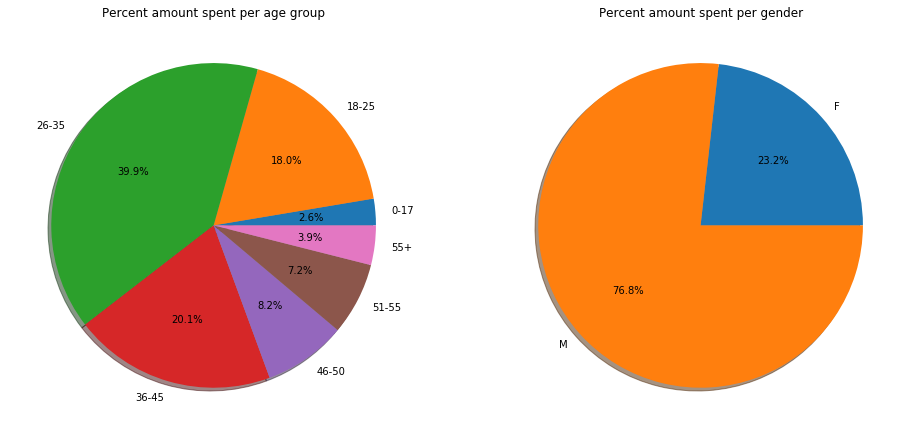

In [248]:
data = df.groupby('Age')['Purchase'].sum()
data_Sex = df.groupby('Gender')['Purchase'].sum()
plt.figure(figsize=(16,16));
plt.subplot(121)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per age group');
plt.subplot(122)
plt.pie(data_Sex.values,labels = data_Sex.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per gender');

It Looks like count of people in different Age groups in data is in correlation with total percent of amount spent.
Similarly with Gender males were 75% their spendings in total is 76.8%, females were 25% their spendings in total is 23.2%. 

### 4. Conclusion

From the questions and Solutions lets write a summary of our findings.

**Findings**
1. People of Age group 51-55 have purchased with high amount per person (9600 dollars per person).
2. 75% of total people visited were Male and 60% of total people were between Age 26-45.
3. People from Age group 26-35 collectively have spent more amount (40% of sale purchase is from this group).
4. P00265242 was the product which attratcted most of the adults and P00255842 attracted 0-17 Age group.
5. Unmarreid Male who are 45% in the datset have spent 9000 dollars per person.
6. Even though less no of customers are of Ocuupation 12,15,17 the spend more rougly 9800 dollars per person.
7. Highest No of customers are from Occupation 0,4 and 7.
8. High no of customers are of newly settled people but customers who are 2 years residents have spent 9400 dollars per person.
9. Product P00025442 has got highest total sale amount of about 27.5 million but it is not the highest repeated product in sale P00265242 was highest repeated with 1858 times(1858 customers have bought this).

### 5. Communication

This is the whole part what we have done. After doing Whole Process till Conclusion How do you present those findings to the clients is the Communication Part. Either As a PDF,Html file etc., Or by using Advnaced Data Analytics tools like Tableau create a dashboard to show the visuals.